# Example of CNN Siamese for Fashion MNIST dataset

Note that this model is relatively poor in accuracy **but** it can still improve but I leave it as it because I find the embedding plots too funny ! :D

Furthermore it shows that the `evaluation` accuracy can differ from the `binary accuracy` in training which was not shown by the `MNIST` example

Note : the **only** differences between this notebook and the `example_mnist` is the `model_name` and the `get_dataset()` argument (and the title / filename :p )

## Imports + model initialization

In [1]:
import time
import numpy as np
import pandas as pd
import tensorflow as tf

from tqdm import tqdm

from utils import plot, plot_multiple, plot_confusion_matrix, set_display_options, sample_df
from datasets import get_dataset, prepare_dataset, test_dataset_time
from models.siamese import ImageSiamese

set_display_options()

input_shape = (28,28,1)
model_name = 'fashion_mnist_siamese'

In [2]:
model = ImageSiamese(input_shape, nom = model_name)

print(model)

Initialisation du sous-modèle : siamese !
Modèle siamese sauvé dans pretrained_models\fashion_mnist_siamese\saving\siamese.json !
Modele fashion_mnist_siamese correctement initialisé !

========== fashion_mnist_siamese ==========
Sub model siamese
- Inputs 	: [(None, 28, 28, 1), (None, 28, 28, 1)]
- Outputs 	: (None, 1)
- Number of layers 	: 7
- Number of parameters 	: 0.039 Millions
- Model not compiled

Already trained on 0 epochs (0 steps)

Embedding dim : 28
Distance metric : euclidian


## Model instanciation + dataset loading

In [2]:
model = ImageSiamese(nom = model_name)

model.compile()

print(model)
model.encoder.summary()

Model restoration...
Initializing submodel : siamese !
Optimizer 'siamese_optimizer' initilized successfully !
Submodel siamese compiled !
  Loss : {'reduction': 'auto', 'name': 'binary_crossentropy', 'from_logits': False, 'label_smoothing': 0}
  Optimizer : {'name': 'Adam', 'learning_rate': 0.0010000000474974513, 'decay': 0.0, 'beta_1': 0.8999999761581421, 'beta_2': 0.9990000128746033, 'epsilon': 1e-07, 'amsgrad': False}
  Metrics : [{'name': 'binary_accuracy', 'dtype': 'float32', 'threshold': 0.5}, {'name': 'EER', 'dtype': 'float32', 'num_thresholds': 200, 'curve': 'ROC', 'summation_method': 'interpolation', 'thresholds': [0.005025125628140704, 0.010050251256281407, 0.01507537688442211, 0.020100502512562814, 0.02512562814070352, 0.03015075376884422, 0.035175879396984924, 0.04020100502512563, 0.04522613065326633, 0.05025125628140704, 0.05527638190954774, 0.06030150753768844, 0.06532663316582915, 0.07035175879396985, 0.07537688442211055, 0.08040201005025126, 0.08542713567839195, 0.0904

In [3]:
def to_pandas(ds):
    return pd.DataFrame([
        {'id' : sample['label'].numpy(), 'image' : sample['image'].numpy()}
        for sample in ds
    ])

ds = get_dataset('fashion_mnist')

train, valid = to_pandas(ds['train']), to_pandas(ds['test'])

print("Train size : {} - Valid size : {}".format(len(train), len(valid)))

Train size : 60000 - Valid size : 10000


## Training + history analysis

In [5]:
model.train(
    train, validation_data = valid,
    epochs = 25, batch_size = 64, pred_step = 2500,
    augment_prct = 0.25, max_by_id = 1000
)

Training config :
HParams :
- augment_prct	: 0.25
- epochs	: 25
- batch_size	: 64
- valid_batch_size	: 32
- test_batch_size	: 1
- verbose	: 1
- train_size	: None
- valid_size	: None
- test_size	: 4
- pred_step	: 2500
- shuffle_size	: 1024

Epoch 1/25
    152/Unknown - 2s 11ms/step - loss: 0.5836 - siamese_BinaryAccuracy: 0.5416 - EER: 0.2088 - AUC: 0.8584
Saving after 1 hour training !
157/157 [==============================] - 3s 20ms/step - loss: 0.5826 - siamese_BinaryAccuracy: 0.5446 - EER: 0.2079 - AUC: 0.8590 - val_loss: 0.5284 - val_siamese_BinaryAccuracy: 0.7505 - val_EER: 0.1958 - val_AUC: 0.8875
Epoch 2/25
152/157 [============================>.] - ETA: 0s - loss: 0.5167 - siamese_BinaryAccuracy: 0.7692 - EER: 0.1776 - AUC: 0.8959
Saving at epoch 1 !
157/157 [==============================] - 2s 15ms/step - loss: 0.5164 - siamese_BinaryAccuracy: 0.7699 - EER: 0.1770 - AUC: 0.8960 - val_loss: 0.4915 - val_siamese_BinaryAccuracy: 0.8145 - val_EER: 0.1766 - val_AUC: 0.9024
Epoch

===== History =====
        loss  siamese_BinaryAccuracy      EER       AUC  val_loss  val_siamese_BinaryAccuracy  val_EER  \
0   0.555960                0.621915  0.20785  0.873781  0.528419                    0.750498  0.19585   
1   0.508048                0.788316  0.17700  0.899279  0.491498                    0.814540  0.17655   
2   0.470953                0.835539  0.15875  0.915179  0.460862                    0.841162  0.15980   
3   0.439653                0.861863  0.14450  0.933614  0.446379                    0.840466  0.14945   
4   0.412609                0.879329  0.12455  0.943921  0.415037                    0.865346  0.13665   
5   0.387912                0.892864  0.11015  0.955414  0.396530                    0.871119  0.13105   
6   0.365088                0.901373  0.10105  0.961774  0.378878                    0.879976  0.12230   
7   0.344878                0.910679  0.08950  0.966582  0.367465                    0.881369  0.11885   
8   0.324368              

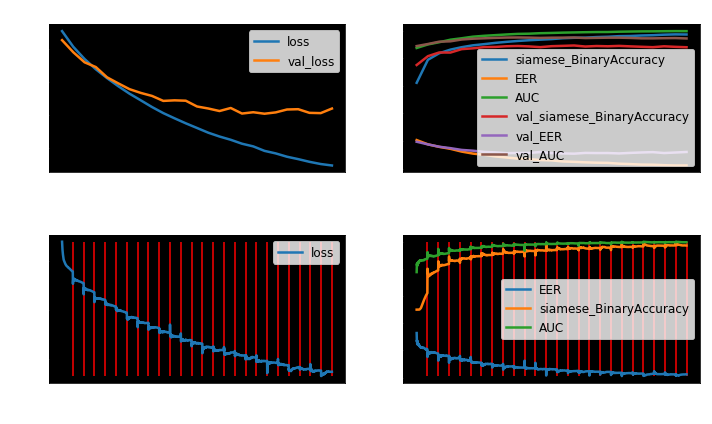

In [6]:
print(model.history)
model.plot_history()

## Embeddings

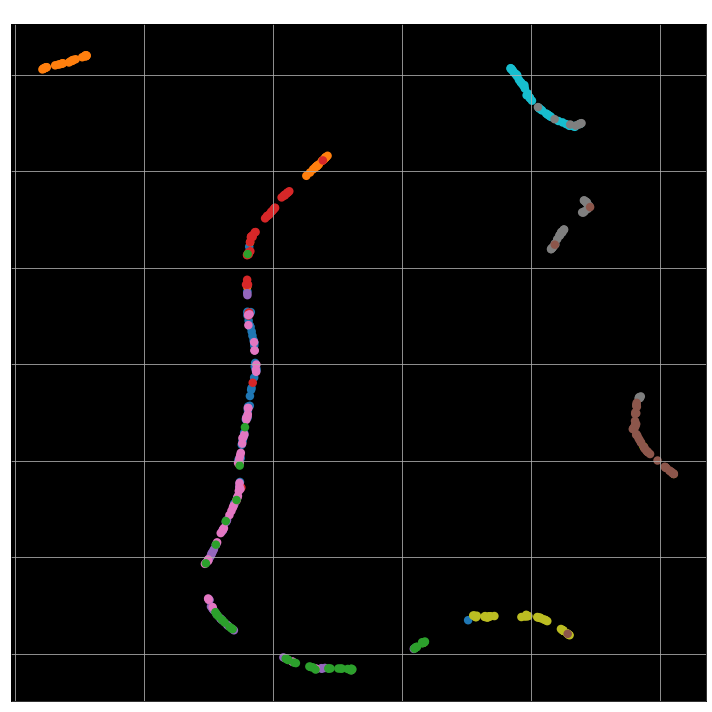

In [7]:
datas = sample_df(valid, n = 10, n_sample = 50)

model.plot_embedding(datas)

## Prediction

### Comparaison

Reminder : by default the model computes a distance-score and not a similarity score. It means that the score on pictures is the probability to belong to different class. 

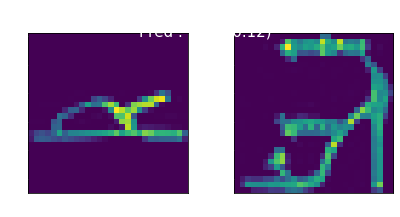

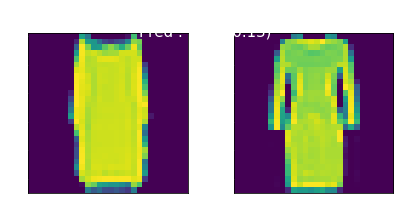

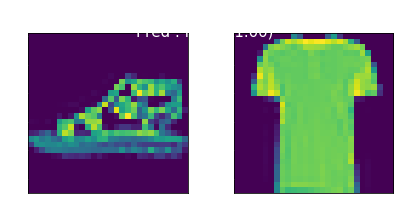

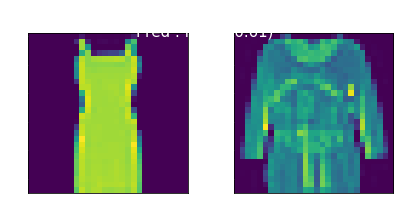

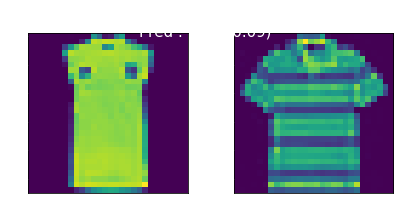

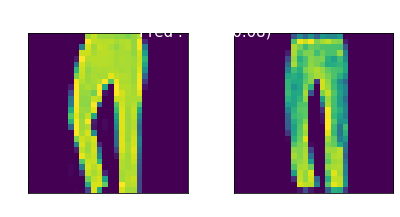

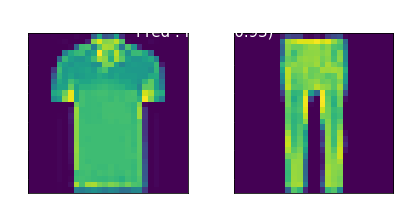

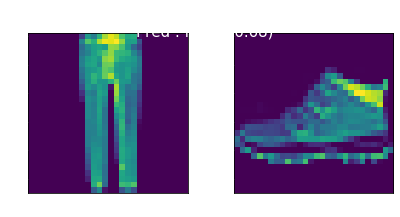

In [8]:
config = model.get_dataset_config(is_validation = True, batch_size = 2)

ds_train = prepare_dataset(train, ** config)

n = 2
for i, (inputs, target) in enumerate(ds_train):
    if i >= n: break
    
    x, y = inputs
    
    scores = tf.squeeze(model(inputs))
    pred = model.decode_output(scores)
    target = model.decode_output(tf.cast(target, tf.float32))
    
    data = {}
    for i, (xi, yi, ti, si, pi) in enumerate(zip(x, y, target, scores, pred)):
        plot_multiple(
            input_x = xi, input_y = yi, plot_type = 'imshow', size = 3,
            title = 'Same : {}\nPred : {} ({:.2f})'.format(ti, pi, float(si))
        )


### Class prediction

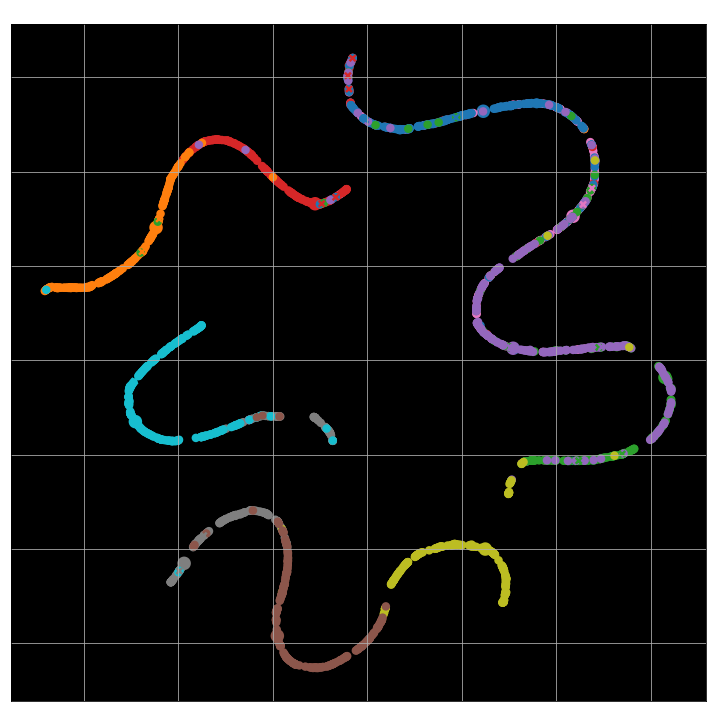

Accuracy : 0.80


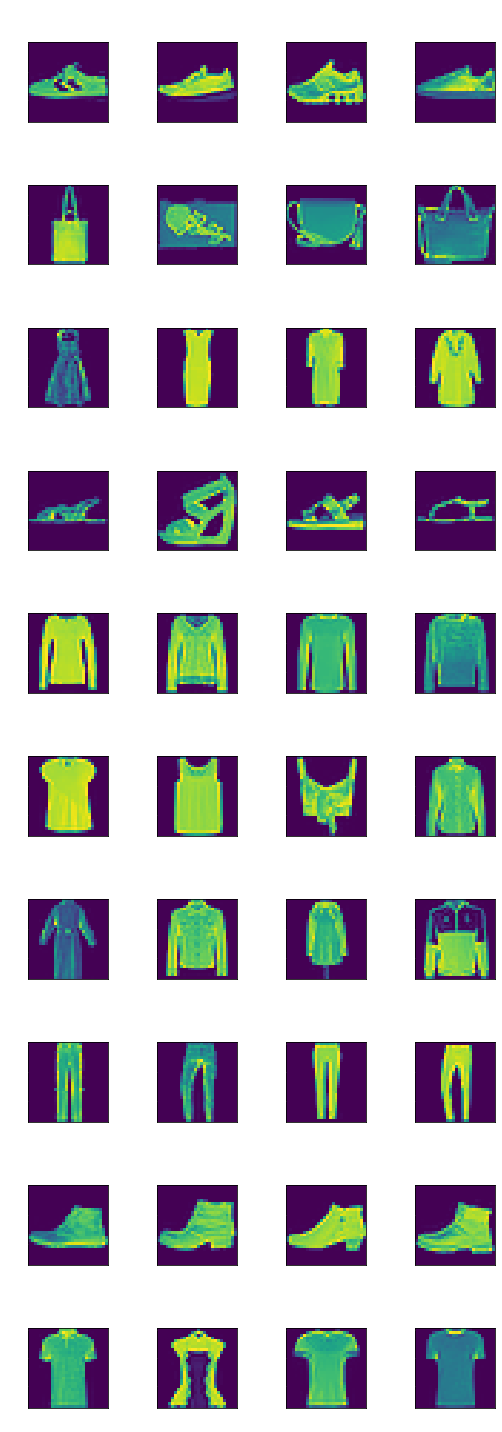

<Figure size 540x540 with 0 Axes>

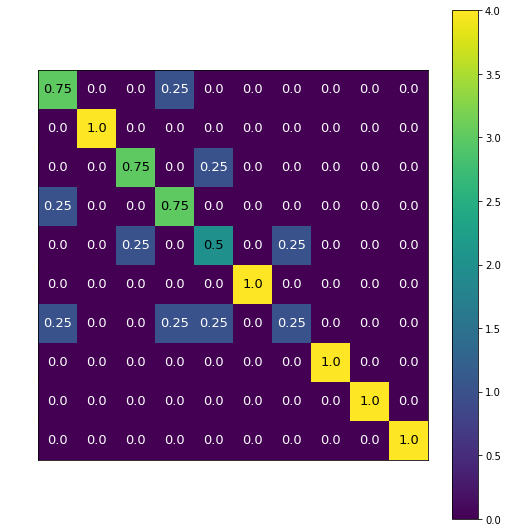

In [4]:
samples = sample_df(train, n = 10, n_sample = 250)
embedded_samples = model.embed(samples)

valid_samples = sample_df(valid, n = 10, n_sample = 4)

ids = valid_samples['id'].values
images = valid_samples['image'].values
pred = model.recognize(
    valid_samples, samples = embedded_samples, ids = samples['id'].values, k = 7, plot = True
)

predictions = {
    'pred_{}'.format(i) : {'x' : images[i], 'title' : 'Class : {}\nPred : {}'.format(id_i, pred_i)}
    for i, (id_i, pred_i) in enumerate(zip(ids, pred))
}

print("Accuracy : {:.2f}".format(np.sum(ids == pred) / len(pred)))

plot_multiple(
    ** predictions, plot_type = 'imshow', ncols = 4, size = 2
)
plot_confusion_matrix(true =  ids, pred = pred)

## Evaluation

Here we can see that the `accuracy` is far lower than the `binary accuracy` from training !

In [7]:
t0 = time.time()
acc = model.evaluate(valid, samples = train, sample_size = 500, k = 13)
print("Accuracy : {:.2f}% (evaluation time : {:.3f} sec)".format(
    acc * 100, time.time() - t0))

Accuracy : 77.19% (evaluation time : 66.984 sec)


## Dataset analysis

Here we can see examples of pairs of same / not same labels : **it is the most important part** to be sure datas are well associated and avoid to lose time training on wrong datas !

In [ ]:
config = model.get_dataset_config(is_validation = False, batch_size = 2)

ds_train = prepare_dataset(train, ** config, debug = True)

n = 2
for i, (inputs, target) in enumerate(ds_train):
    if i >= n: break
    
    (x, y) = inputs
    
    print(target)
    sames, not_sames = {}, {}
    for i, (xi, yi) in enumerate(zip(x, y)):
        if i < len(x) // 2:
            sames.update({
                'x_{}'.format(i) : xi,
                'y_{}'.format(i) : yi
            })
        else:
            not_sames.update({
                'x_{}'.format(i) : xi,
                'y_{}'.format(i) : yi
            })
    
    plot_multiple(
        title = 'Same pairs', ** sames, plot_type = 'imshow', size = 2
    )
    plot_multiple(
        title = 'Not same pairs', ** not_sames, plot_type = 'imshow', size = 2
    )
